In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Đọc dữ liệu từ file csv vào dataframe
df = pd.read_csv(".././Dataset/AMZN.csv")
df1=df.reset_index()['Open']

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [3]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [4]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [5]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest= create_dataset(test_data, time_step)

In [6]:
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=X_train[0][0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)
kf.em(X_train[0])
test_data

array([[0.81867851],
       [0.831195  ],
       [0.83462425],
       [0.86403849],
       [0.88159753],
       [0.88862042],
       [0.87393622],
       [0.87651682],
       [0.84363892],
       [0.84918606],
       [0.86390082],
       [0.86929128],
       [0.83026608],
       [0.85388455],
       [0.83599675],
       [0.83369907],
       [0.85701945],
       [0.8979257 ],
       [0.91560328],
       [0.91254865],
       [0.93113612],
       [0.91168845],
       [0.90098406],
       [0.92086376],
       [0.9216283 ],
       [0.93146104],
       [0.93208429],
       [0.98803022],
       [0.97414883],
       [0.93922945],
       [0.93067738],
       [0.94575148],
       [0.92493143],
       [0.93099472],
       [0.92392212],
       [0.89142654],
       [0.88951504],
       [0.86581233],
       [0.90366022],
       [0.9155153 ],
       [0.91245309],
       [0.90990702],
       [0.88378052],
       [0.84975575],
       [0.85776881],
       [0.8942441 ],
       [0.85098288],
       [0.844

In [7]:
# Dự đoán giá chứng khoán cho tập kiểm tra và tập xác thực
test_observed = test_data
validate_observed = val_data

test_predicted, _ = kf.filter(test_observed)
val_predicted, _ = kf.filter(validate_observed)
val_predicted

array([[0.09803574],
       [0.23174876],
       [0.27014924],
       [0.27480942],
       [0.27952778],
       [0.2838888 ],
       [0.28595654],
       [0.28716938],
       [0.27917088],
       [0.30083253],
       [0.29402254],
       [0.28433856],
       [0.26781536],
       [0.25129757],
       [0.25108733],
       [0.24921186],
       [0.25029535],
       [0.28270261],
       [0.27797698],
       [0.26263681],
       [0.24935509],
       [0.24127995],
       [0.227216  ],
       [0.22748299],
       [0.22404693],
       [0.21090939],
       [0.21609315],
       [0.2061009 ],
       [0.20344553],
       [0.20397294],
       [0.21660195],
       [0.22623779],
       [0.22265712],
       [0.20931585],
       [0.22887868],
       [0.23539381],
       [0.25527286],
       [0.29326996],
       [0.2901319 ],
       [0.31316006],
       [0.31251922],
       [0.29894991],
       [0.29014816],
       [0.30719681],
       [0.30900673],
       [0.28626877],
       [0.3096446 ],
       [0.323

In [8]:
test_predicted=scaler.inverse_transform(test_predicted)
val_predicted=scaler.inverse_transform(val_predicted)
yval=yval.reshape(-1,1)
ytest=ytest.reshape(-1,1)
yval=scaler.inverse_transform(yval)
ytest=scaler.inverse_transform(ytest)

In [9]:
valid_rmse = np.sqrt(np.mean((val_predicted[:39] - yval)**2))
test_rmse = np.sqrt(np.mean((test_predicted[:176] - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 24.91929701856321
Testing RMSE: 32.051364357652574


In [10]:
from sklearn import metrics
valid_mape = round(metrics.mean_absolute_error(val_predicted[:39],yval),4)
test_mape = round(metrics.mean_absolute_error(test_predicted[:176],ytest),4)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 22.8411
Testing MAPE: 26.5441


In [11]:
lst_output = []
x_input = val_data[60:]
temp_input=list(x_input)
n_steps=78

i = 0
while i < 10:
    if(len(temp_input)>78):
        new=[]
        x_input = temp_input[1:]
        for num in x_input:
            if type(num) == np.ndarray:
                for num2 in num:new.append(num2)
            else:new.append(num)
        x_input=new
        print("{} day input {}".format(i, x_input))

        yhat = kf.filter(x_input)
        yhat = list(yhat)
        print("{} day output {}".format(i,yhat[0][-1]))
        temp_input.extend(yhat[0])
        temp_input = temp_input[1:]
        lst_output.extend(yhat[0][-1])
        i += 1
    else:
        yhat = kf.filter(x_input)
        yhat=list(yhat)
        print(yhat[0])
        temp_input.extend(yhat[0])
        print(len(temp_input))
        lst_output.extend(yhat[0][-1])
        i=i+1

0 day input [0.327226722283, 0.31644586477590186, 0.2976366022436221, 0.29580157275418484, 0.30360055130556207, 0.28379732912137545, 0.2895318440634914, 0.2808153813514752, 0.2863970064792143, 0.26758780511509406, 0.2777569657363268, 0.29648974513131854, 0.28784971203445076, 0.284332542869953, 0.2849442397558186, 0.2772217443417293, 0.2565775134881717, 0.2860911580362815, 0.2814270782373407, 0.30077150099605854, 0.3316614291302762, 0.32110994457484265, 0.3190454809655814, 0.33670777169525845, 0.33655487423486186, 0.3185102672170037, 0.3261562871398249, 0.3188161156599365, 0.3232508148611928, 0.34511843948648147, 0.34978251928542226, 0.3508529544285973, 0.35429364045580714, 0.36316305415035943, 0.3390016006101646, 0.34060725714793716, 0.3393839245443655, 0.3363255089292171, 0.32523874181102663, 0.34909434690828867, 0.35742853920824347, 0.3634688414251328, 0.34534781243814605, 0.3602575283495878, 0.3799077919052184, 0.39183562886093903, 0.37080907407318064, 0.3718030337250877, 0.39565863

In [12]:
lst_output=np.array(lst_output).reshape(-1,1)
lst_output=scaler.inverse_transform(lst_output)

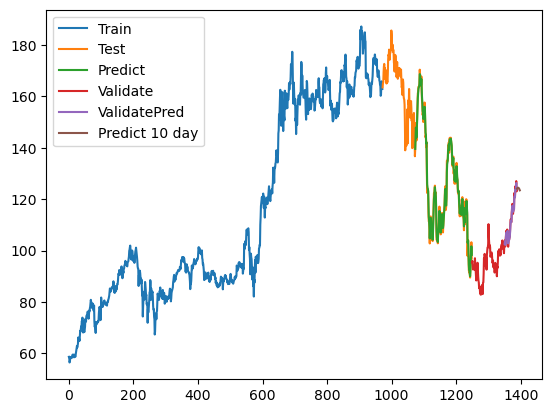

In [13]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_predicted[101:,0]))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,val_predicted[101:,0])
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,lst_output[:,0])
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict 10 day'])
plt.show()